# Generative Adversarial Nets

Generative Adversarial Nets 이하 GAN은 기존 생성 모델들이 갖는 한계점을 극복하기 위해 나온 새로운 프레임워크입니다.</br>
GAN은 Adversarial이라는 말 답게 두 개의 서로 대립하는 **Generator**와 **Discriminator**로 이루어져 있습니다.

- **Generator**는 실제 존재하지 않지만 있을법한 fake image를 생성하고
- **Discrimiator**는 하나의 image를 받아서 이것이 fake image인지 real image인지 구분합니다.

</br>

본 논문의 저자인 이안 굿펠로는 이를 위조지폐범과 경찰로 비유했습니다.</br>
G는 D가 구분하지 못하게 더욱 정교한 이미지를 생성하도록 학습하고, </br>
D는 G가 만들어낸 fake image와 real image를 더욱 잘 구분하도록 학습합니다.

</br>

이러한 상호 대립적인 관계는 V에 대해여 상호 간섭할 수 없는 G와 D가 min max게임을 한다고 표현합니다.

$$
min_G max_D V(D, G) = E_{x\sim p_{data}(x)}[log(D(x))] + E_{z\sim p_z(z)}[log(1 - D(G(z)))]
$$

</br>

위의 식을 살펴보자면
저희는 실제 데이터인 $x$를 가지고 있고 이 $x$들은 가상의 데이터 분포인 $p_{data}$를 따를것입니다.</br>
또한 임의의 분포인 노이즈 분포 $p_z$를 만들고 여기서 latent vector를 추출하여 이를 통해 G를 학습시킬것입니다.

</br>

G는 저희가 만든 노이즈 분포에서 latent vector을 추출하고 이를 사용하여 fake image를 만듭니다 $\ldots G(z)$</br>
G는 D가 fake image를 real image라고 판단하도록 학습되어야하므로 $D(G(z)) = 1$이 되도록 학습할 것이고,</br>
결과적으로 $E_{z\sim p_z(z)}[log(1 - D(G(z)))]$의 값을 최소로 만들도록 경사 하강법을 통해 학습할 것입니다.

</br>

D는 실제 데이터 분포에서 추출한 real image와 G가 만들어낸 fake image를 구분합니다.</br>
D는 real image는 1로 예측하고 fake image는 0으로 예측하도록 학습되어야 하므로 $D(x) = 1, D(G(z)) = 0$이 되도록 학습할 것이고,</br>
결과적으로 $E_{x\sim p_{data}(x)}[log(D(x))] + E_{z\sim p_z(z)}[log(1 - D(G(z)))]$의 값을 최대로 만들도록 경사 하강법을 통해 학습할 것입니다.

</br>

모델이 이상적으로 학습된다고 가정하면, G가 가지고 있는 노이즈 분포는 현실 데이터의 분포에 가까워 질것이고, $x = G(z),\:p_g = p_{data}$</br>
 D는 처음에는 fake image를 잘 구분하다가 G가 학습될수록 구분하지 못하고 최종적으로는 $1\over 2$의 값만을 반환하게 될것입니다. $\frac{p_{data}(x)}{p_{data}(x) + p_g(x)} = \frac{1}{2}$

<img src="https://drive.google.com/uc?id=1DRfH8RltQM_k_38k0ZwlshsSgNHqerkQ">

</br>

---

## 증명

1. $p_g = p_{data}$라고 가정했을 때 $D_G(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}$임을 증명해보면

</br>

$$
min_G max_D V(D, G) = E_{x\sim p_{data}(x)}[log(D(x))] + E_{z\sim p_z(z)}[log(1 - D(G(z)))]\\
= \int_x p_{data}(x)log(D(x))dx + \int_z p_z(z)log(1 - D(G(z)))dz\\
= \int_x p_{data}(x)log(D(x))dx + p_g(x)log(1 - D(x))dx\;\;\; \because G(z) = x
$$

</br>

이때 $alog(y) + blog(1-y)$는 $a\over a + b$일때 최대값을 가집니다. 따라서 $a = p_{data},\; b = p_g(x)$라고 했을때 </br>
V(D, G)는 $D_G(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}$일때 최대값을 가집니다.

</br>

D는 V(G, D)의 값이 MAX가 되도록 학습하기 때문에 최종적으로 D(x)는 $\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}$가 됩니다.

</br>

2. D가 V를 최대로 만들 때 V를 최소로 만드는 G가 $p_g = p_{data}$임을 증명해보면

$$
C(G) = max_DV(G, D) = E_{x\sim p_{data}(x)}[log(D(x))] + E_{z\sim p_z(z)}[log(1 - D(G(z)))]\\
= E_{x\sim p_{data}(x)}[log(\frac{p_{data}(x)}{p_{data}(x) + p_g(x)})] + E_{z\sim p_g(x)}[log(\frac{p_g(x)}{p_{data}(x) + p_g(x)}] \;\;\; \because D(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}\\
= E_{x\sim p_{data}(x)}[log(\frac{2\times p_{data}(x)}{p_{data}(x) + p_g(x)})] + E_{z\sim p_g(x)}[log(\frac{2\times p_g(x)}{p_{data}(x) + p_g(x)}] - log(4)\\
$$

여기서 C(G)는 D가 V값을 MAX로 만들때의 V입니다.</br>
증명1을 바탕으로 C(G)의 D(x)를 $\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}$로 치환한 후 각 항에 2를 곱하면 위의 식이 됩니다.

$$
= KL(p_{data}||\frac{p_{data}(x) + p_g(x)}{2}) + KL(p_{data}||\frac{p_g(x) + p_g(x)}{2}) - log(4)\\
= 2\times JSD(p_{data}||p_g) - log(4)
$$

위의 식을 KL divergence로 변환 한 후 다시 JS divergence로 변환합니다.</br>
이때 JSD는 두 확률분포간의 거리이기 때문에 최솟값이 0입니다. 따라서 C(G)는 두 확률분포가 일치할때 즉, $p_g = p_{data}$일때 최솟값 $-log(4)$을 가집니다.

</br>

---
## 장단점

장점
1. 기존 생성 모델들에 비해 압도적인 성능
2. 학습데이터가 적어도 생성자와 판별자의 상호 보완적인 관계로 보충 가능
3. latent vector로 생성되는 결과를 조절가능

단점
1. 모델 훈련이 불안정 함
2. 성능평가의 어려움


# 구현

In [2]:
import torch
import torch.nn as nn

from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

In [3]:
latent_dim = 100

class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()

    def block(input_dim, output_dim, normalize=True):
      layers = [nn.Linear(input_dim, output_dim)]
      if normalize:
        layers.append(nn.BatchNorm1d(output_dim, 0.8))
      layers.append(nn.LeakyReLU(0.2, inplace=True))
      return layers

    self.model = nn.Sequential(
        *block(latent_dim, 128, normalize=False),
        *block(128, 256),
        *block(256, 512),
        *block(512, 1024),
        nn.Linear(1024, 1 * 28 * 28),
        nn.Tanh()
    )

  def forward(self, z):
    img = self.model(z)
    img = img.view(img.size(0), 1, 28, 28)
    return img

임의로 **latent vertor**을 100차원으로 설정한 후 Generator를 정의하였습니다.</br>
Generator의 각 층은 Linear layer로 이루어져 있고 활성화 함수로 LeakyReLU함수를 사용하였습니다.</br>
또한 Generator는 총 5개의 층을 가지고 있으며 input dimension은 latent vector dimension인 100이고, output dimension은 image size인 1 * 28 * 28입니다.</br>

Generator는 노이즈 분포로부터 z를 받아서 생성한 fake image를 반환합니다.

In [4]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.model = nn.Sequential(
        nn.Linear(1 * 28 * 28, 512),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(512, 256),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(256, 1),
        nn.Sigmoid()
    )

  def forward(self, img):
    flattened = img.view(img.size(0), -1)
    output = self.model(flattened)
    
    return output

Discriminator는 3개의 Linear층을 가지고 있고 활성화 함수로는 LeakyReLU함수를 사용하엿습니다.</br>
또한 마지막 출력층에서 sigmoid함수를 통해서 real image일 확률값을 반환할수 있게 하였습니다.</br>
Discriminator의 input dimension은 image를 flatten한 1 * 28 * 28이고, output dimension은 해당 image각 real image일 확률인 1입니다.



In [ ]:
transforms_train = transforms.Compose([
                                       transforms.Resize(28),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5], [0.5])
])

train_dataset = datasets.MNIST(root='./dataset', train=True, download=True, transform=transforms_train)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)

학습 데이터로는 MNIST를 사용하였고, batch size는 128로 하였습니다.

In [8]:
generator = Generator()
discriminator = Discriminator()

generator.cuda()
discriminator.cuda()

adversarial_loss = nn.BCELoss()
adversarial_loss.cuda()

lr = 0.0002

optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5 ,0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))



Generator와 Discriminator class를 각각 생성해 주었고, 역전파를 위한 adversarial_loss 또한 이진 크로스앤트로피로 정의해 주었습니다.

optimizer로는 Adam을 사용하였고 learning rate와 beta는 생성 모델에서 가장 보편적인 값을 그대로 사용하였습니다.

In [ ]:
n_epochs = 200
sample_interval = 2000

for epoch in range(1, n_epochs + 1):
  for i, (imgs, _) in enumerate(dataloader):
    real = torch.cuda.FloatTensor(imgs.size(0), 1).fill_(1.0)
    fake = torch.cuda.FloatTensor(imgs.size(0), 1).fill_(0.0)

    real_imgs = imgs.cuda()

    optimizer_G.zero_grad()

    z = torch.normal(mean=0, std=1, size=(imgs.shape[0], latent_dim)).cuda()

    generated_imgs = generator(z)

    g_loss = adversarial_loss(discriminator(generated_imgs), real)
    g_loss.backward()
    optimizer_G.step()

    optimizer_D.zero_grad()

  
    real_loss = adversarial_loss(discriminator(real_imgs), real)
    fake_loss = adversarial_loss(discriminator(generated_imgs.detach()), fake)
    d_loss = (real_loss + fake_loss) / 2

    d_loss.backward()
    optimizer_D.step()

    done = epoch * len(dataloader) + i
    if done % sample_interval == 0:
      save_image(generated_imgs.data[:25], f"{done}.png", nrow=5, normalize=True)

  print(f"[Epoch {epoch}/{n_epochs}]")

epoch수는 200으로 하였고 loss 계산을 위한 label(real, fake)을 정의하였습니다.</br>
Generator를 먼저 학습한 후 Discriminator를 학습하였습니다.</br>

노이즈 분포 Z는 정규분포로 정의했으며, g_loss 는 Discriminator가 fake image를 real image로 예측하도록 하였습니다.</br>
```
g_loss = adv_loss(D(fake image), 1)
```

d_loss는 real image를 1로 예측하고 fake image를 0으로 예측하도록 real_loss와 fake_loss의 합으로 정의하였습니다.
```
d_loss = real_loss + fake_loss
real_loss = adv_loss(D(real_image), 1)
fake_loss = adv_loss(D(fake_image), 0)
```

마지막으로 Generator가 생성하는 fake image를 5x5로 저장했습니다.

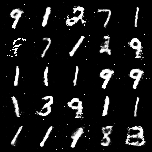

In [10]:
from IPython.display import Image

Image('94000.png')

학습이 종료된 후 최종적으로 생성된 MNIST image입니다.